<a href="https://colab.research.google.com/github/andydela/Customer_Churn_Analysis-LP2/blob/main/EDA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_set2 = pd.read_csv("/content/LP2_Telco-churn-second-2000.csv")
data_set2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [ ]:
data_set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [ ]:

# Replace blank or whitespace strings with NaN
data_set2['TotalCharges'] = data_set2['TotalCharges'].replace(' ', pd.NA)

# Convert the 'TotalCharges' column to float
data_set2['TotalCharges'] = pd.to_numeric(data_set2['TotalCharges'], errors='coerce')


In [ ]:
data_set2.iloc[:,:].apply(np.unique)

customerID          [0011-IGKFF, 0013-EXCHZ, 0020-JDNXP, 0023-XUOP...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [No, Yes]
Dependents                                                  [No, Yes]
tenure              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
PhoneService                                                [No, Yes]
MultipleLines                             [No, No phone service, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, No internet service, Yes]
OnlineBackup                           [No, No internet service, Yes]
DeviceProtection                       [No, No internet service, Yes]
TechSupport                            [No, No internet service, Yes]
StreamingTV                            [No, No internet service, Yes]
StreamingMovies     

In [ ]:
def convert_to_boolean(value):
    if value == 'Yes':
        return 1
    elif value == 'No':

        return 0
    elif value == "Male":
        return 1
    elif value == "Female":
        return 0


    else:
        return value

# Identify the columns to be converted to boolean
columns_to_convert = ['gender','Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']  # Replace with your column names

# Apply the conversion function to the selected columns
data_set2[columns_to_convert] = data_set2[columns_to_convert].applymap(convert_to_boolean)

# Save the updated DataFrame back to a CSV file
data_set2.to_csv('updated_dataset.csv', index=False)

In [ ]:
churn_dataset= pd.read_csv("/content/updated_dataset.csv")

In [ ]:
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,1,0,0,0,6,1,No,DSL,No,...,No,Yes,No,No,Month-to-month,1,Credit card (automatic),49.50,312.7,0
1,8292-TYSPY,1,0,0,0,19,1,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,1,Credit card (automatic),55.00,1046.5,1
2,0567-XRHCU,0,0,1,1,69,0,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,1,Credit card (automatic),43.95,2960.1,0
3,1867-BDVFH,1,0,1,1,11,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,74.35,834.2,1
4,2067-QYTCF,0,0,1,0,64,1,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,111.15,6953.4,0


In [ ]:
#creating a correlation matrix
#the code in the block creates a correlation matrix of the numerical data
corr = churn_dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-48-8eea0e5f3b9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = churn_dataset.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.005012,-0.014187,0.019802,-0.007525,-0.006146,-0.010576,-0.008935,0.001212,0.001900
SeniorCitizen,0.005012,1.000000,0.053107,-0.244179,0.031546,0.000184,0.156220,0.221250,0.110835,0.159825
Partner,-0.014187,0.053107,1.000000,0.435294,0.337836,-0.002357,-0.037480,0.101466,0.289502,-0.138748
Dependents,0.019802,-0.244179,0.435294,1.000000,0.147302,-0.010427,-0.109747,-0.126045,0.047355,-0.170734
tenure,-0.007525,0.031546,0.337836,0.147302,1.000000,0.000634,-0.007815,0.256277,0.829246,-0.353437
PhoneService,-0.006146,0.000184,-0.002357,-0.010427,0.000634,1.000000,0.023745,0.267577,0.123570,0.017288
PaperlessBilling,-0.010576,0.156220,-0.037480,-0.109747,-0.007815,0.023745,1.000000,0.331893,0.138464,0.192790
MonthlyCharges,-0.008935,0.221250,0.101466,-0.126045,0.256277,0.267577,0.331893,1.000000,0.655612,0.188267
TotalCharges,0.001212,0.110835,0.289502,0.047355,0.829246,0.123570,0.138464,0.655612,1.000000,-0.196020
Churn,0.001900,0.159825,-0.138748,-0.170734,-0.353437,0.017288,0.192790,0.188267,-0.196020,1.000000


In [ ]:
data_set2.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2040.000000,2043.000000
mean,0.500245,0.168380,0.487518,0.308860,32.649046,0.892315,0.597161,64.712555,2303.214681,0.272149
std,0.500122,0.374295,0.499967,0.462136,24.376248,0.310058,0.490589,29.970010,2261.934905,0.445175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.550000,18.850000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.825000,434.250000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,70.250000,1398.275000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.625000,3846.962500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.350000,8670.100000,1.000000


In [ ]:
data_set2[["tenure","MonthlyCharges"]].describe()

,tenure,MonthlyCharges
count,2043.000000,2043.000000
mean,32.649046,64.712555
std,24.376248,29.970010
min,0.000000,18.550000
25%,9.000000,35.825000
50%,30.000000,70.250000
75%,55.000000,89.625000
max,72.000000,118.350000


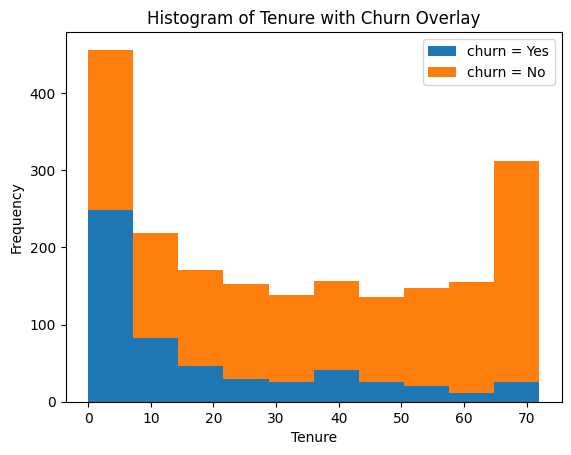

In [ ]:

#assignig tenure variables from churn attributes = 1 and 0
tenure_x= churn_dataset[churn_dataset.Churn ==1]['tenure']
churn_z = churn_dataset[churn_dataset.Churn ==0]['tenure']


#plot the histogram for 'tenure' and 'churn' variables.
plt.hist([tenure_x, churn_z], bins = 10, stacked = True)
plt.legend(['churn = Yes', 'churn = No'])
plt.title('Histogram of Tenure with Churn Overlay')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()



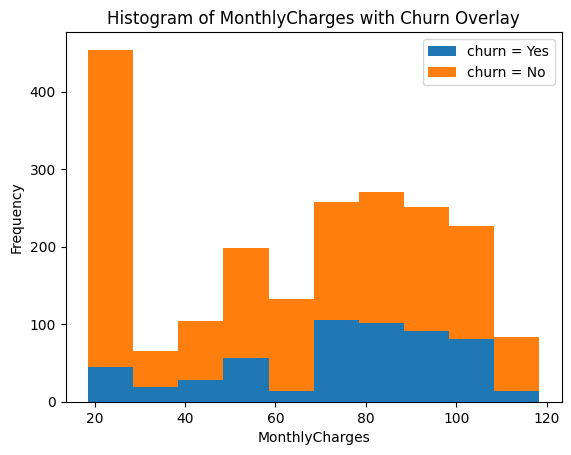

In [ ]:
#assignig tenure variables from churn attributes = 1 and 0

charges_z = churn_dataset[churn_dataset.Churn ==0]['MonthlyCharges']
charges_y =churn_dataset[churn_dataset.Churn == 1]['MonthlyCharges']

plt.hist([charges_y, charges_z], bins = 10, stacked = True)
plt.legend(['churn = Yes', 'churn = No'])
plt.title('Histogram of MonthlyCharges with Churn Overlay')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()


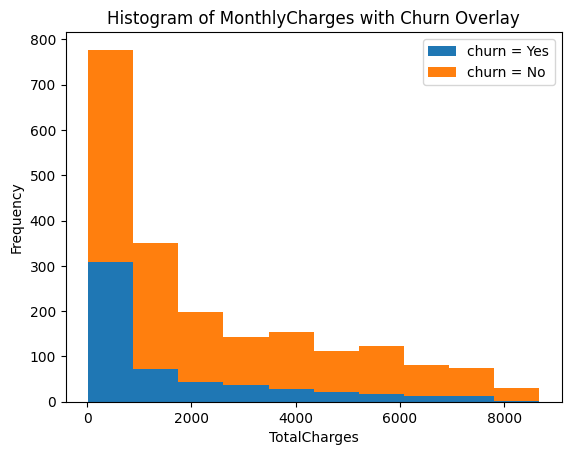

In [ ]:
charges_z = churn_dataset[churn_dataset.Churn ==0]['TotalCharges']
charges_y =churn_dataset[churn_dataset.Churn == 1]['TotalCharges']

plt.hist([charges_y, charges_z], bins = 10, stacked = True)
plt.legend(['churn = Yes', 'churn = No'])
plt.title('Histogram of MonthlyCharges with Churn Overlay')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()
